42


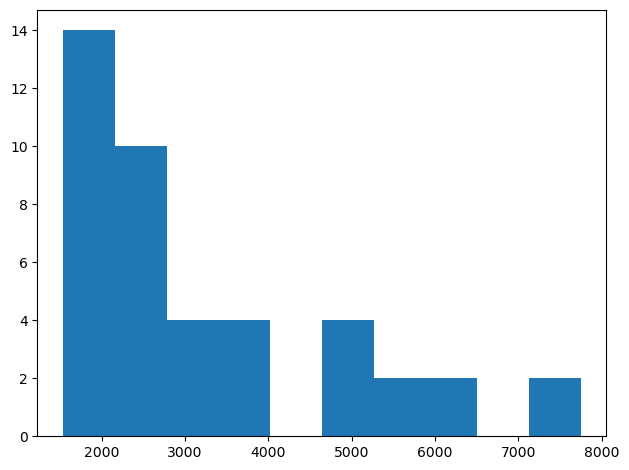

In [8]:
import numpy as np
import os
from scipy.stats import zscore
from pandas import read_csv
from architecturefns import *
from collections import OrderedDict
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

from plotty import *
from experimentsetup import *

main_dir = "/wewalksubset_accelerometer" # allsites as potential dataset?

dataset = []
item = 0
fref = OrderedDict() # DISTMAT IDX
label_colors = OrderedDict()
idtoidx = OrderedDict()
labels = []
lens = []
for (root,dirs,files) in os.walk(main_dir):
    print(len(files))
    for f in files:
        d = read_csv(main_dir+'/'+f,sep=",",header=None)
        d = d.iloc[:,3] # AccelerationTimeStamp, timeStartingAt0, Acceleration-X, Acceleration-Y, Acceleration-Z, RMSValueOFXYZ
        dataset.append(np.asarray(d)) # all rows, second column
        lens.append(len(d))
        txt = f[:-23]
        txt = txt.replace("2R_","")
        fref[item] = txt.replace("_"," ")
        tmp = fref[item]
        labels.append(tmp)
        idtoidx[fref[item]] = item
        if "ID6" in fref[item]:
            label_colors[tmp] = 'r'
        elif "ID7" in fref[item]:
            label_colors[tmp] = 'g'
        elif "ID8" in fref[item]:
            label_colors[tmp] = 'b'
        elif "ID11" in fref[item]:
            label_colors[tmp] = 'c'
        elif "ID13" in fref[item]:
            label_colors[tmp] = 'm'
        elif "ID14" in fref[item]:
            label_colors[tmp] = 'y'
        else:
            label_colors[tmp] = 'k'
        item += 1

plt.hist(lens, bins=10)
plt.show()

42


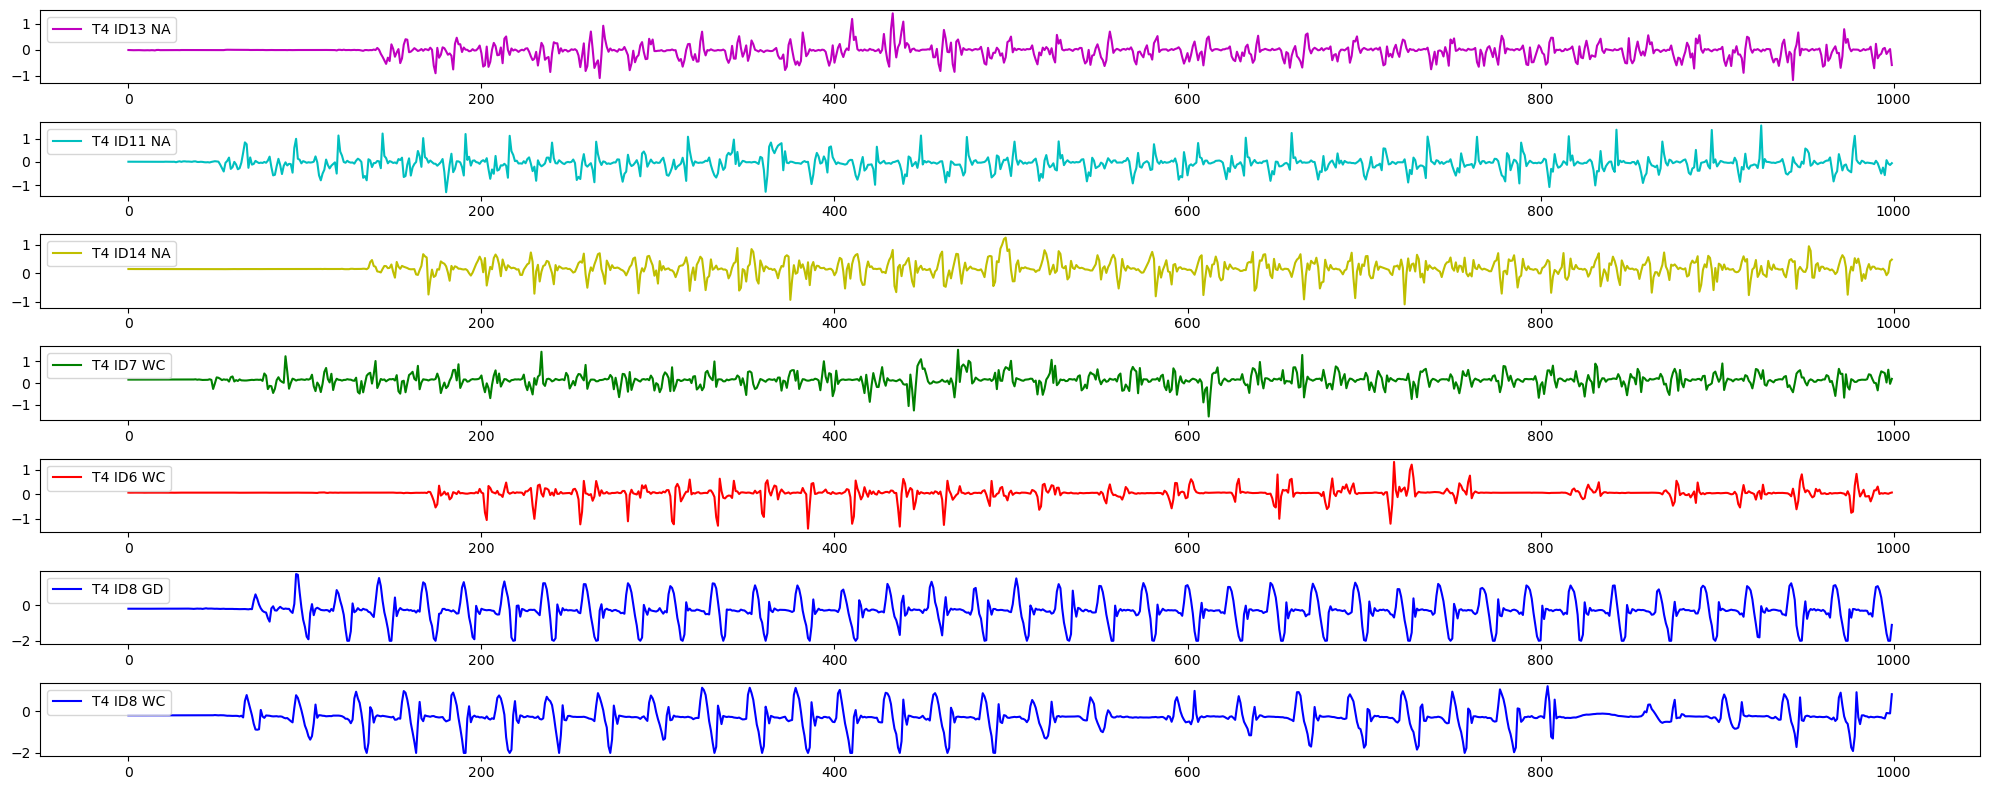

In [3]:
print(len(dataset))
g = 0
fig,axs = plt.subplots(7,1,figsize=(20,8))
for i in range(len(labels)):
    if "T4" in labels[i]:
        ts =dataset[i]
        axs[g].plot(ts[:1000],label=labels[i],c=label_colors[labels[i]])
        axs[g].legend()
        g+=1
plt.show()

In [10]:
use_dicts = []
dlens = []
ePRECIS = Experiment("PRECIS", [8,25], algyield=True) # if you want to see a perfect clustering from PRECIS ,change S=8 to S=10
for i in tqdm(range(len(dataset))):
    ts = dataset[i]
    d, _ = ePRECIS.make_exemplar(zscore(ts))
    use_dicts.append(d)
    dlens.append(len(d))

values,counts = np.unique(dlens,return_counts=True)
for i in zip(values,counts):
    print(i)

print("Finished Making Dictionaries")

PRECISdistmat = ePRECIS.distmat_from_dicts(use_dicts)

Make Distmat:   0%|          | 0/42 [00:00<?, ?it/s]

(4, 1)
(5, 1)
(6, 9)
(7, 4)
(8, 2)
(9, 3)
(10, 22)
Finished Making Dictionaries


Make Distmat: 100%|██████████| 42/42 [01:09<00:00,  1.66s/it]


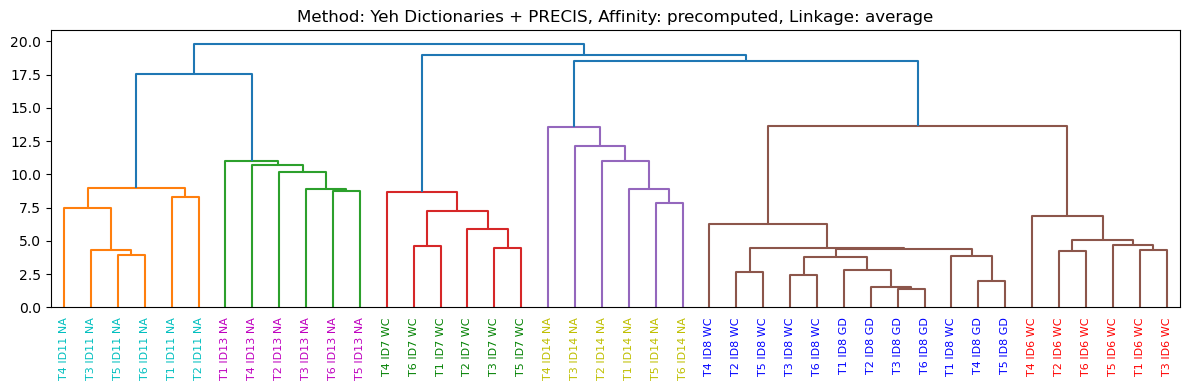

In [15]:
# for linkage in ['complete','average','single']:
plotty_ac(None, "Yeh Dictionaries + PRECIS", 'precomputed', 'average', PRECISdistmat, fref, label_colors)

### Catch22

In [5]:
import catch22 # znorm internally

observationvectors = []
fsobservationvectors = []
for i in tqdm(range(len(dataset))):
    ts = dataset[i]
    fV = catch22.catch22_all(ts)
    fV_values = np.array(fV['values'])
    observationvectors.append(fV_values) 
    # fsobservationvectors.append(fV_values[[5,3,0]]) # FS on C22, see WeAllWalk_CLA.py; this is for fun

100%|██████████| 42/42 [00:01<00:00, 21.35it/s]


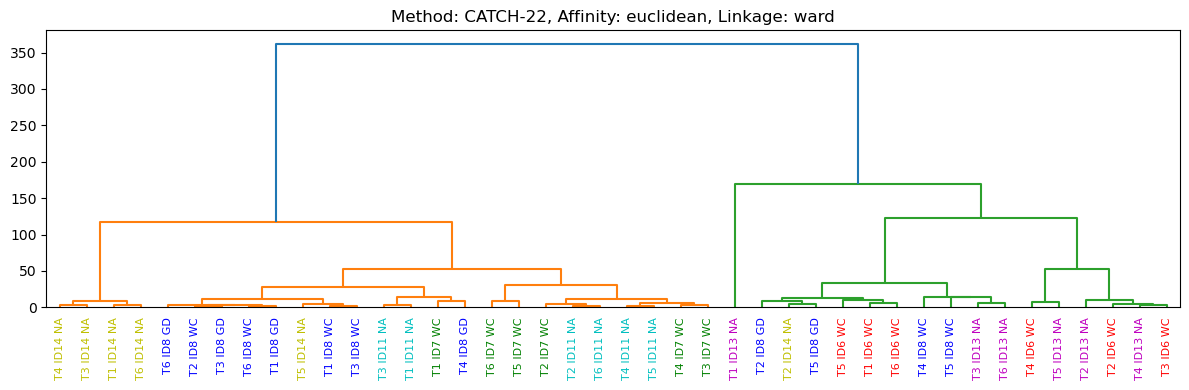

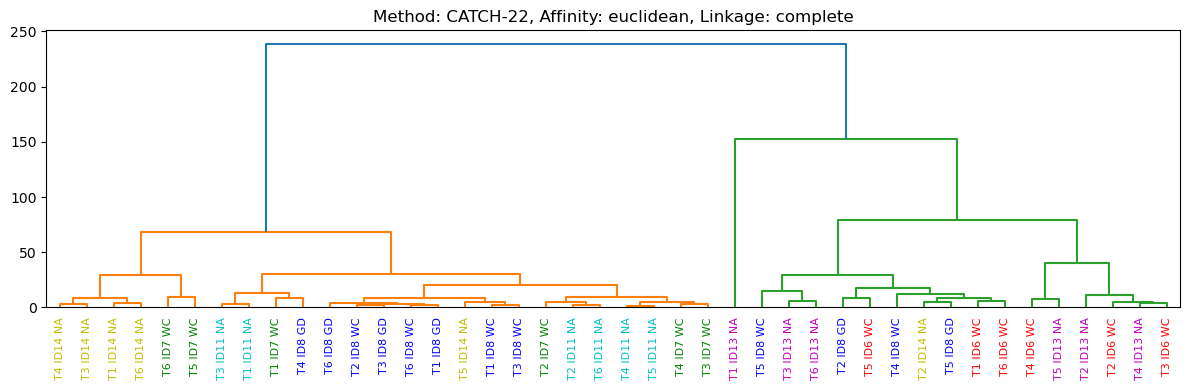

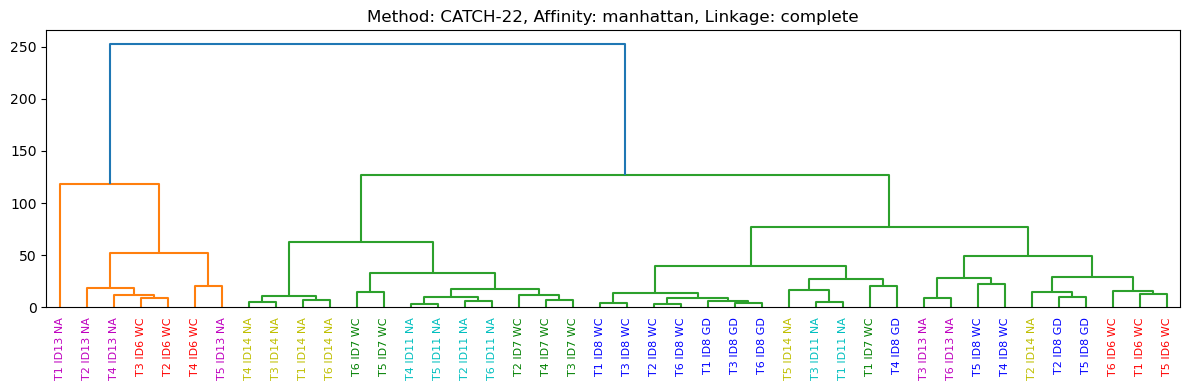

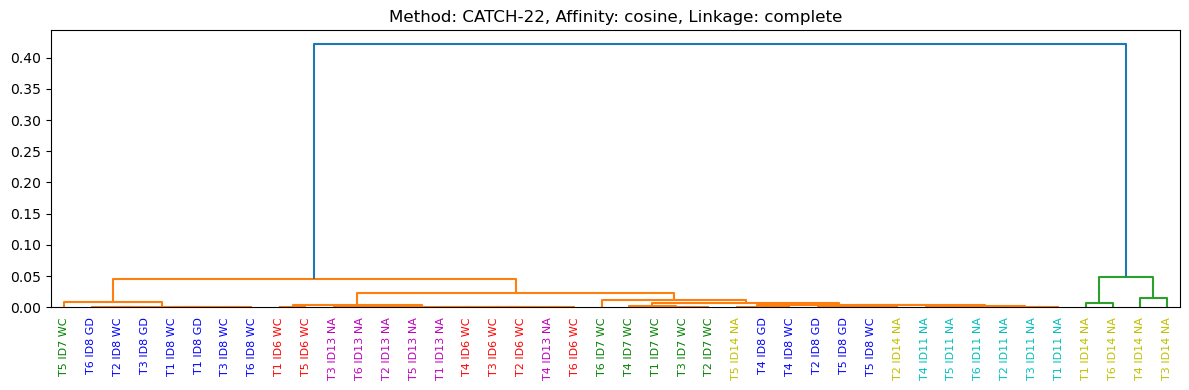

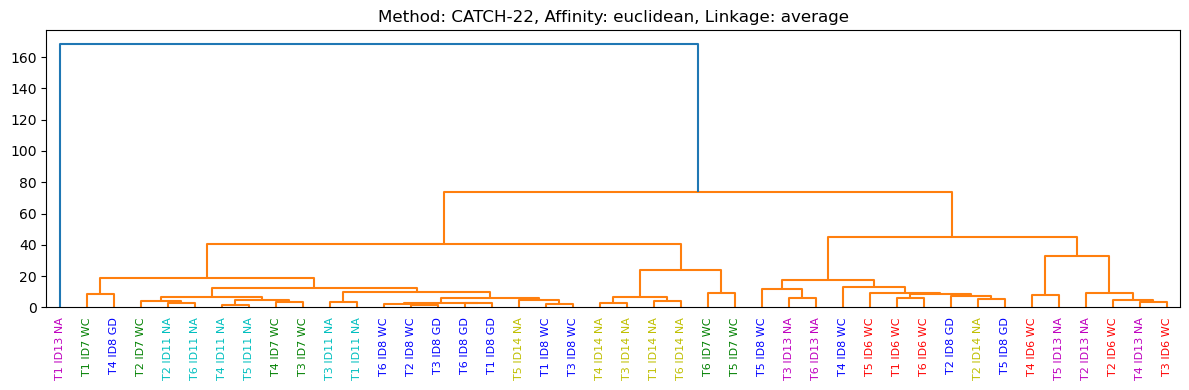

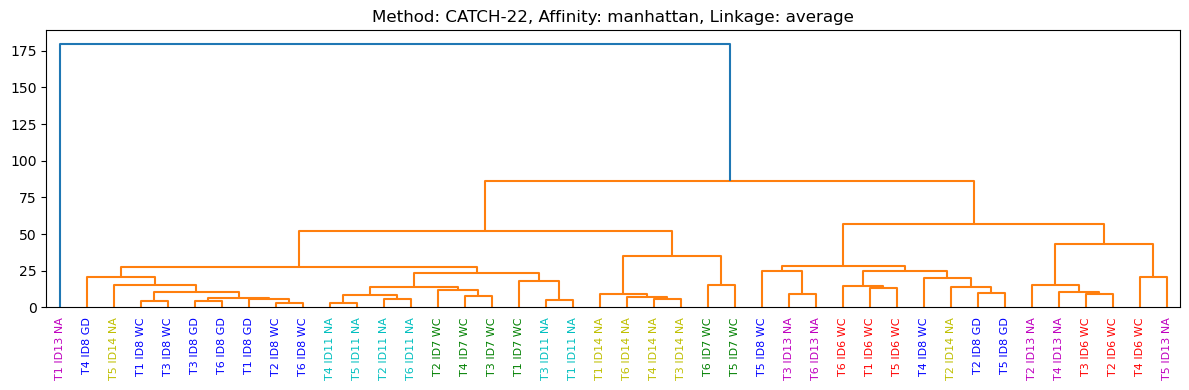

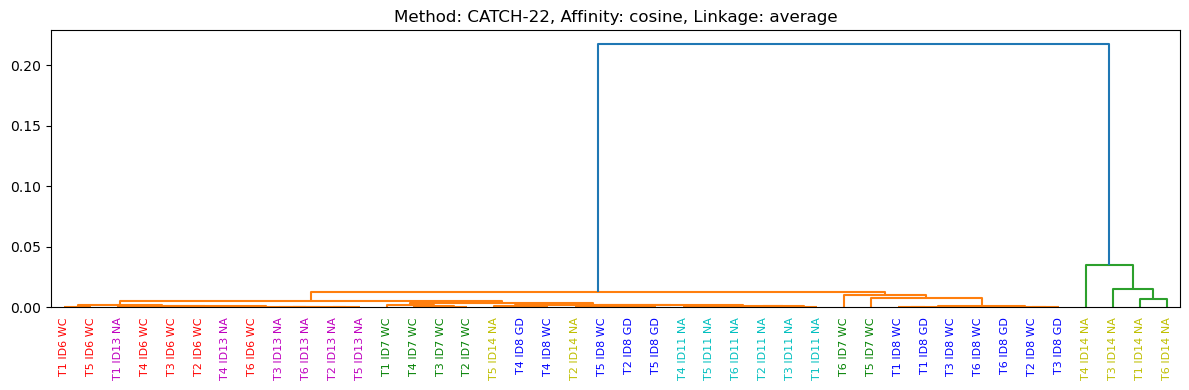

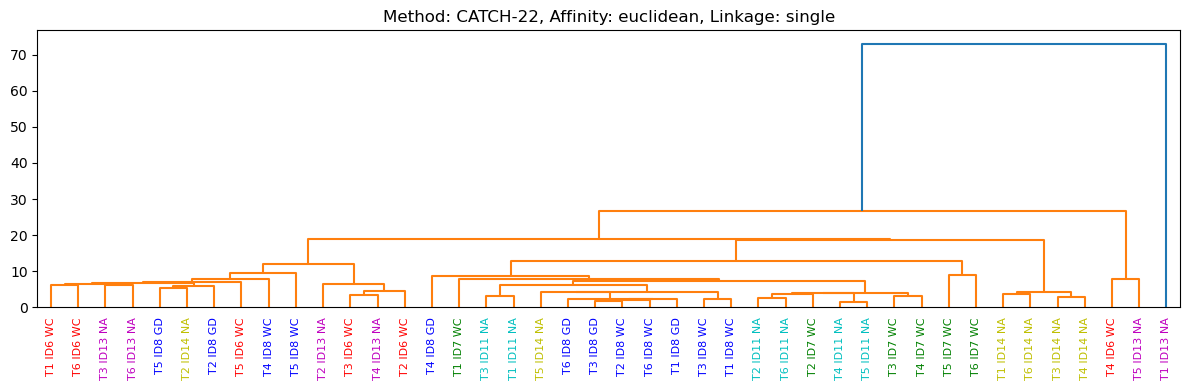

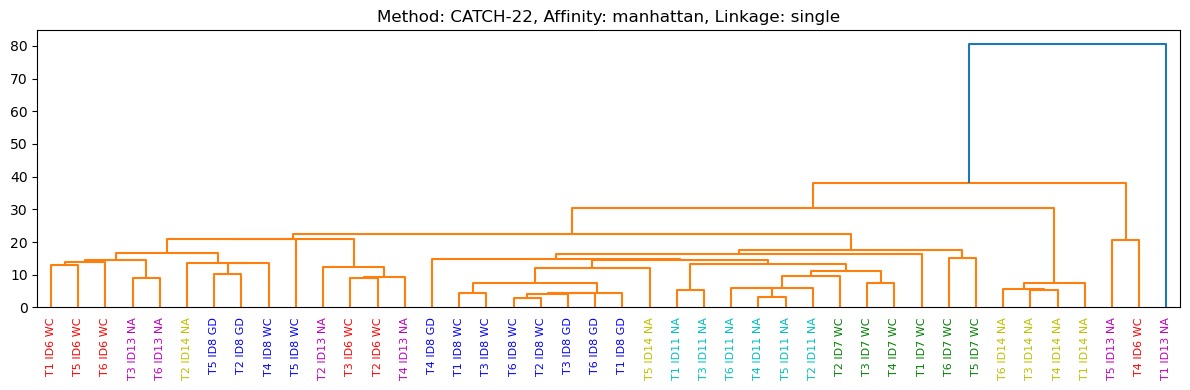

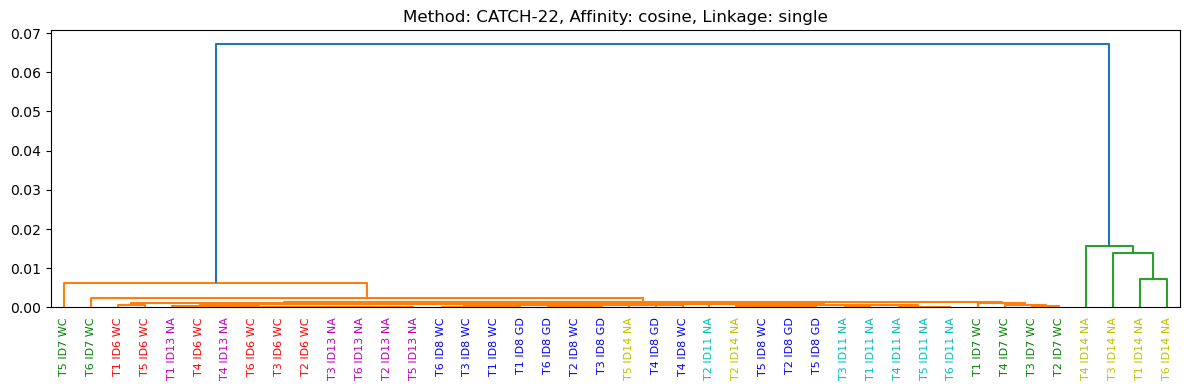

In [7]:
rootsavename = "<save figures here>"
linkagetypes = ['ward','complete', 'average', 'single']
affinities = ['euclidean','manhattan', 'cosine'] #l2 and l1 are also accepted, but are redundant
for linkage in linkagetypes:
    for affinity in affinities:
        if linkage == 'ward':
            # plotty_ac(rootsavename+"euclidean{}.svg".format(linkage), "CATCH-22", "euclidean", linkage, observationvectors, fref, label_colors)
            plotty_ac(None, "CATCH-22", "euclidean", linkage, observationvectors, fref, label_colors)
            # plotty_ac(None, "CATCH-22", "euclidean", linkage, fsobservationvectors, fref, label_colors)
            break
        else:
            # plotty_ac(rootsavename+"{}{}.svg".format(affinity,linkage), "CATCH-22",affinity,linkage,observationvectors,fref,label_colors)
            plotty_ac(None, "CATCH-22", affinity, linkage, observationvectors, fref, label_colors)
            # plotty_ac(None, "CATCH-22", affinity, linkage, fsobservationvectors, fref, label_colors)

#NOTE: our comparison in the paper can be found using the average linkage, manhattan distance metric on ALL C22 features 